In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

from module_class import Node, UnstableNode, Center, NegCenter
from landscape_class import Landscape
from landscape_visuals import *
from morphogen_regimes import *

# import module_class

# %load_ext autoreload

Landscape with modules:
Node at (-1.5, 0.0), a = 1.5, s = 1.0,
Node at (1.5, 0.0), a = 2.0, s = 0.8,
UnstableNode at (0.0, 1.0), a = 1.3, s = 0.8


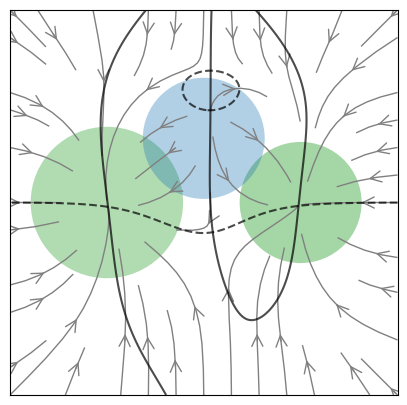

In [3]:
# Landscape with one regime + simple visualization

M1 = Node(x=-1.5, y=0., a=1.5, s=1.)
M2 = Node(x=1.5, y=0., a=2., s=0.8)
M3 = UnstableNode(x=0., y=1., a=1.3, s=0.8)

module_list = [M1, M2, M3]


l = Landscape(module_list, A0 = 0.05, regime=mr_const, n_regimes=1)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')

Landscape with modules:
Node at (-1.5, 0.0), a = [1.5 2. ], s = [1.  0.6],
Node at (1.5, 0.0), a = [2 2], s = [0.5 1.2],
UnstableNode at (0.0, 1.0), a = [1.3 1.4], s = [0.8 0.5]


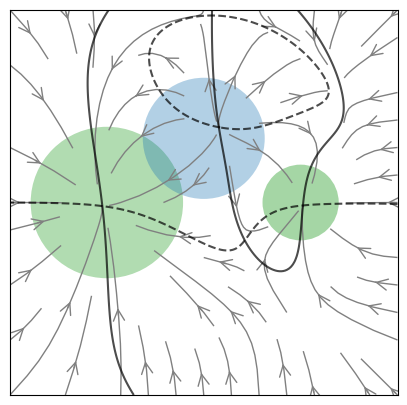

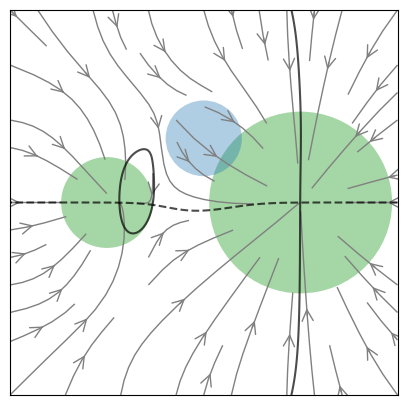

In [17]:
# Landscape with two regimes (piecewise) 

M1 = Node(x=-1.5, y=0., a=(1.5, 2.), s=(1., 0.6))
M2 = Node(x=1.5, y=0., a=(2, 2), s=(0.5, 1.2))
M3 = UnstableNode(x=0., y=1., a=(1.3, 1.4), s=(0.8, 0.5))

module_list = [M1, M2, M3]


l = Landscape(module_list, A0 = 0.005, regime=mr_piecewise, n_regimes=2)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')
fig = visualize_landscape(l, xx, yy, regime=1, color_scheme='fp_types')

In [68]:
def modules_to_txt(module_list, filename):
    for module in module_list:
        module_str = module.__class__.__name__ +':'
        for par in module.mutable_parameters_list:
            value = getattr(module, par)
            if isinstance(value, np.ndarray):
                par_str = np.array2string(value, separator=',')
            else:
                par_str = str(value)
            module_str += ' ' + par+'='+ par_str +','
        # module_str += ')'
        print(module_str)
        
modules_to_txt(l.module_list, '')



Node: x=-1.5, y=0.0, a=[1.5,2. ], s=[1. ,0.6],
Node: x=1.5, y=0.0, a=[2,2], s=[0.5,1.2],
UnstableNode: x=0.0, y=1.0, a=[1.3,1.4], s=[0.8,0.5],


In [88]:
def modules_from_txt(str):
    module_list = []
    for line in str.split('\n'):
        pars_dict = {}
        module_name, _, module_pars = line.partition(':')
        module_cls = globals()[module_name]
        # module_cls = getattr(module_class, module_name)
        
        pars_str = [par_str.strip(',') for par_str in module_pars.split(' ') if par_str] 
        for par_str in pars_str:
            par_name, _, par_value = par_str.partition('=')
            if '[' in par_value:
                par_value = np.fromstring(par_value.strip('[]'), sep = ',')
            else:
                par_value = float(par_value)
            pars_dict[par_name] = par_value
    
        module_list.append(module_cls(**pars_dict))
    return module_list
        
module_list = modules_from_txt('Node: x=1.5, y=0.0, a=[2,2], s=[0.5,1.2],')
print(module_list)

In [90]:
np.get_printoptions()['precision']

8